In [162]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import Pitch, Sbopen, VerticalPitch
import numpy as np
from scipy.ndimage import gaussian_filter





In [18]:
parser  = Sbopen()
competitions = parser.competition()
competitions.loc[competitions.competition_name == 'UEFA Euro']





,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
68,55,282,Europe,UEFA Euro,male,False,True,2024,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,2024-07-15T15:52:24.778809,2024-07-15T15:48:50.315500
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402


In [27]:
UEFA_Euro = parser.match(competition_id =55,season_id = 282) 
print(UEFA_Euro)

    match_id match_date            kick_off  home_score  away_score  \
0    3942819 2024-07-10 2024-07-10 22:00:00           1           2   
1    3943043 2024-07-14 2024-07-14 22:00:00           2           1   
2    3942752 2024-07-09 2024-07-09 22:00:00           2           1   
3    3942382 2024-07-06 2024-07-06 22:00:00           2           1   
4    3942349 2024-07-05 2024-07-05 22:00:00           0           0   
5    3930180 2024-06-25 2024-06-25 19:00:00           2           3   
6    3930171 2024-06-20 2024-06-20 19:00:00           1           1   
7    3942227 2024-07-06 2024-07-06 19:00:00           1           1   
8    3942226 2024-07-05 2024-07-05 19:00:00           2           1   
9    3938645 2024-06-26 2024-06-26 19:00:00           0           0   
10   3930184 2024-06-26 2024-06-26 22:00:00           1           2   
11   3941022 2024-07-02 2024-07-02 22:00:00           1           2   
12   3941021 2024-07-02 2024-07-02 19:00:00           0           3   
13   3

In [35]:
pd.set_option('display.max_columns', None)
Euro_2024_final = UEFA_Euro [ UEFA_Euro.match_id == 3943043 ]
print(Euro_2024_final)


   match_id match_date            kick_off  home_score  away_score  \
1   3943043 2024-07-14 2024-07-14 22:00:00           2           1   

  match_status match_status_360               last_updated  \
1    available        available 2024-07-15 15:48:50.315500   

            last_updated_360  match_week  competition_id country_name  \
1 2024-07-15 15:52:24.778809           7              55       Europe   

  competition_name  season_id season_name  home_team_id home_team_name  \
1        UEFA Euro        282        2024           772          Spain   

  home_team_gender home_team_group  home_team_country_id  \
1             male            None                   214   

  home_team_country_name  home_team_managers_id     home_team_managers_name  \
1                  Spain                   5588  Luis de la Fuente Castillo   

  home_team_managers_nickname home_team_managers_dob  \
1           Luis de la Fuente             1961-06-21   

   home_team_managers_country_id home_team_ma

In [36]:
final_match_data = parser.event(3943043)[0]
print (final_match_data.columns)

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'outcome_id', 'outcome_name',
       'under_pressure', 'out', 'counterpress', 'pass_switch',
       'dribble_nutmeg', 'aerial_won', 'pass_cross', 'technique_id',
       'technique_name', 'pass_no_touch', 'foul_won_defensive', 'off_camera',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_one_on_one',
       'shot_statsbomb_xg', 'shot_key_pass_id', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'end_z',

In [97]:
spain_passes= final_match_data.loc[(final_match_data.type_name=="Pass") & (final_match_data.team_name=="Spain")]
spain_passes_df = pd.DataFrame(spain_passes)
location_xy = spain_passes_df[["x", "y"]]
location_xy


,x,y
9,6.9,39.6
12,8.9,57.2
16,28.6,76.4
21,61.9,67.1
24,72.5,80.0
...,...,...
3266,38.6,80.0
3269,82.5,75.3
3277,26.1,21.1
3285,47.9,27.7


In [99]:
location_xy.dropna(inplace=True)
location_xy.head(5)
location_xy.shape


C:\Users\DELL\AppData\Local\Temp\ipykernel_7396\4114261581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_xy.dropna(inplace=True)


(593, 2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7396\786861406.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bin_statistics["statistic"] = (pd.DataFrame((bin_statistics["statistic"]/bin_statistics["statistic"].sum())).applymap(lambda x : '{: .0%}'.format(x)).values)


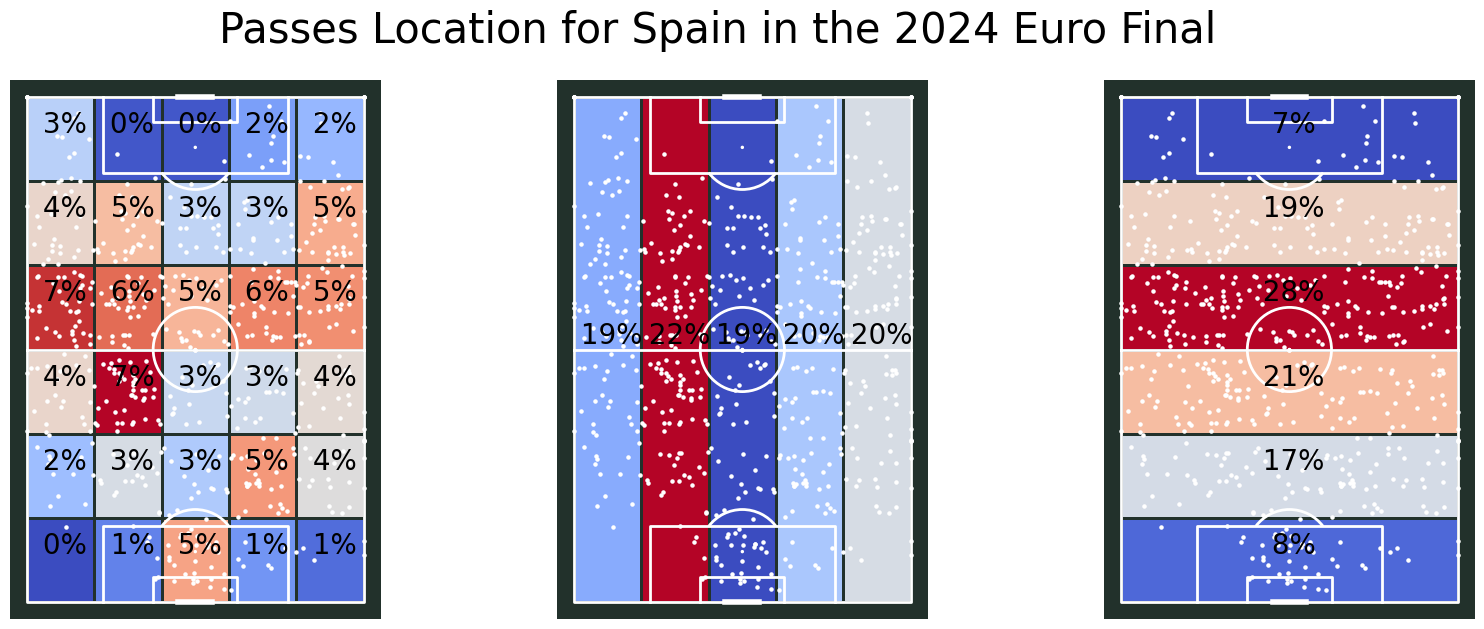

In [145]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1, 3, figsize=(20, 7)) 

for ax in axes:
    pitch = VerticalPitch(pitch_type="statsbomb"  , line_zorder= 2, pitch_color= '#22312b', line_color= "white" )
    pitch.draw(ax=ax)


bins= [(6,5), (1,5), (6,1)]

for ax, bin in zip(axes, bins) :

    
        bin_statistics = pitch.bin_statistic(location_xy.x, location_xy.y, statistic="count", bins=bin)
        pitch.heatmap(bin_statistics, ax=ax, cmap="coolwarm", edgecolors="#22312b")
        pitch.scatter(location_xy.x, location_xy.y, c="white", s=5, ax=ax)
        bin_statistics["statistic"] = (pd.DataFrame((bin_statistics["statistic"]/bin_statistics["statistic"].sum())).applymap(lambda x : '{: .0%}'.format(x)).values)
        pitch.label_heatmap(bin_statistics, color="black", fontsize=20, ax=ax, ha="center", va="bottom")

title= fig.suptitle("Passes Location for Spain in the 2024 Euro Final", x=0.5, y=0.98, fontsize=30,)





C:\Users\DELL\AppData\Local\Temp\ipykernel_7396\2331964992.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bs["statistic"] = (pd.DataFrame(bs["statistic"] / total).applymap(lambda x : '{: .0%}'.format(x)).values)


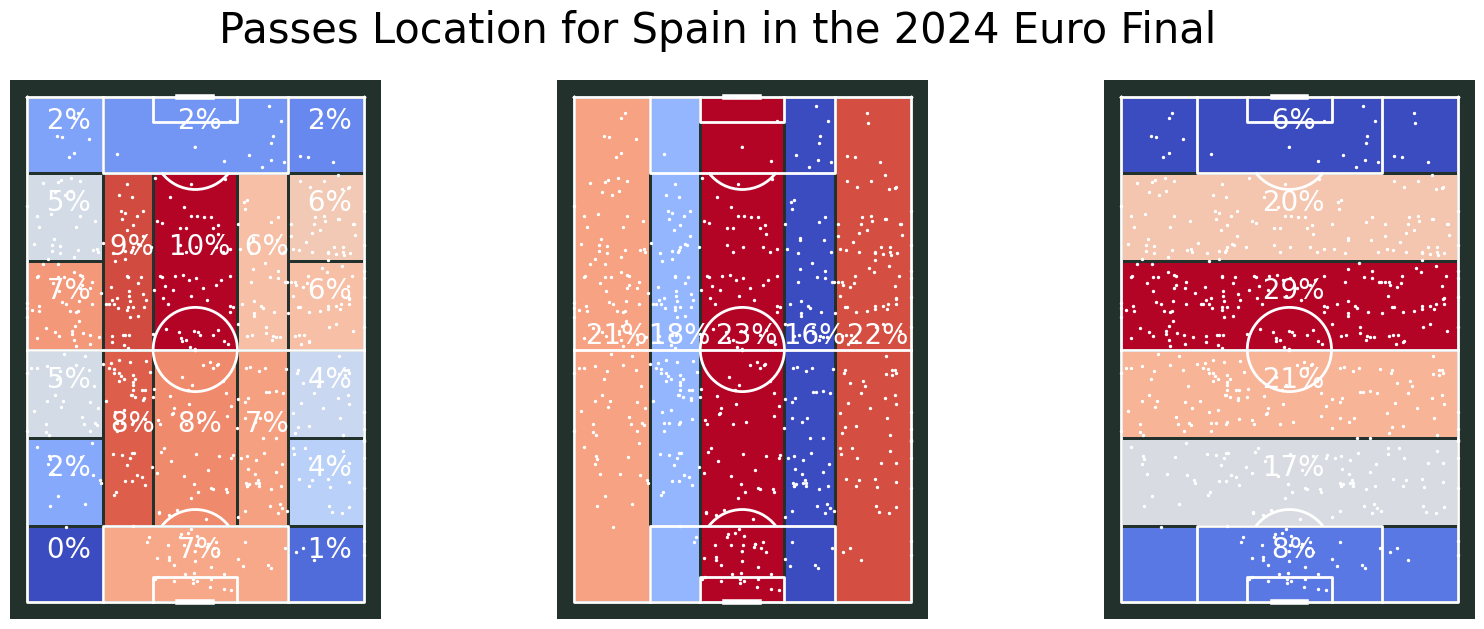

In [156]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7)) 

for ax in axes:
    pitch = VerticalPitch(pitch_type="statsbomb"  , line_zorder= 2, pitch_color= '#22312b', line_color= "white" )
    pitch.draw(ax=ax)


bins= [(6,5), (1,5), (6,1)]

positions=["full", "horizontal","vertical"]



for ax, pos in zip(axes, positions) :

    
        bin_statistics = pitch.bin_statistic_positional(location_xy.x, location_xy.y, statistic="count", positional=pos)
        pitch.heatmap_positional(bin_statistics, ax=ax, cmap="coolwarm", edgecolors="#22312b")
        pitch.scatter(location_xy.x, location_xy.y, c="white", s=2, ax=ax)
        total = np.array([bs['statistic'].sum() for bs in bin_statistics]).sum()
        for bs in bin_statistics:
              
          bs["statistic"] = (pd.DataFrame(bs["statistic"] / total).applymap(lambda x : '{: .0%}'.format(x)).values)
        pitch.label_heatmap(bin_statistics, color="white", fontsize=20, ax=ax, ha="center", va="bottom")

title= fig.suptitle("Passes Location for Spain in the 2024 Euro Final", x=0.5, y=0.98, fontsize=30,)

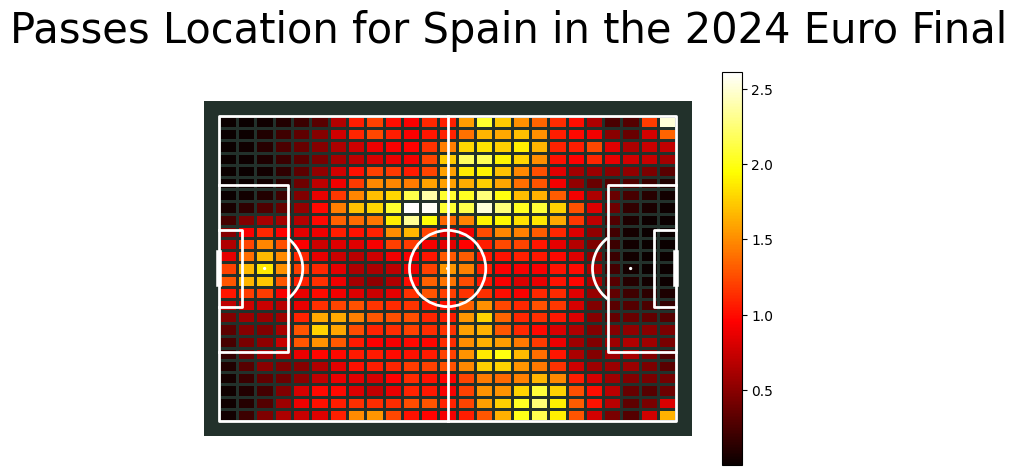

In [163]:


pitch = Pitch(pitch_type="statsbomb"  , line_zorder= 2, pitch_color= '#22312b', line_color= "white" )
fig, ax= pitch.draw()
    
bin_statistics = pitch.bin_statistic(location_xy.x, location_xy.y, statistic="count", bins=(25,25))
bin_statistics["statistic"] = gaussian_filter(bin_statistics["statistic"], 1)
pcm = pitch.heatmap(bin_statistics, ax=ax, cmap="hot", edgecolors="#22312b")
cbar= fig.colorbar(pcm, ax=ax)
        
title= fig.suptitle("Passes Location for Spain in the 2024 Euro Final", x=0.5, y=0.98, fontsize=30,)



